In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(circlize))

In [2]:
in_dir <- "../../results/05_fibroblast/06_cell_state_score"
out_dir <- "../../results/05_fibroblast/16_marker_gene_in_niche"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [3]:
sample_list = c('HC01', 'HC02', 'HC03', 'HC05',
               'SSc4994', 'SSc5380', 
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

In [4]:
# read cell state score
df_scores <- lapply(sample_list, function(sample){
    obj <- readRDS(glue::glue("{in_dir}/{sample}.rds"))
    df_score <- subset(obj@meta.data, select = c("Fib1", "Fib2", "Fib3", "Fib4", "Fib5", 
                                                 "Fib6", "Fib7", "Fib8", "Fib9", "Fib10"))
    rownames(df_score) <- paste0(sample, "_", rownames(df_score))

    return(df_score)
}) %>% do.call(rbind, .)

In [5]:
df_clusters <- read.csv("../../results/04_spatial/15_integrate_with_cell_proportion/niches.csv") %>%
    dplyr::mutate(barcode = paste0(patient_id, "_", barcode)) %>%
    tibble::column_to_rownames("barcode") %>%
    subset(select = c(leiden))

In [6]:
df <- cbind(df_clusters, df_scores) %>%
    group_by(leiden) %>%
    dplyr::summarise(mean_fib1 = mean(Fib1),
                     mean_fib2 = mean(Fib2),
                     mean_fib3 = mean(Fib3),
                     mean_fib4 = mean(Fib4),
                     mean_fib5 = mean(Fib5),
                     mean_fib6 = mean(Fib6),
                     mean_fib7 = mean(Fib7),
                     mean_fib8 = mean(Fib8),
                     mean_fib9 = mean(Fib9),
                     mean_fib10 = mean(Fib10)) %>%
    tibble::column_to_rownames("leiden")

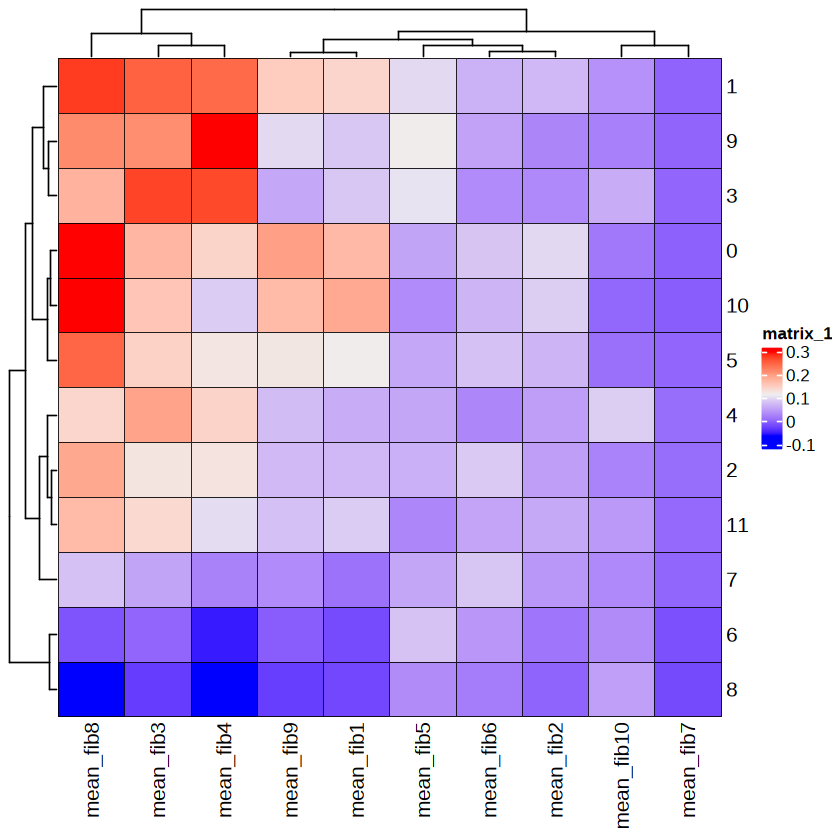

In [7]:
ht <- Heatmap(as.matrix(df), 
              rect_gp = gpar(col = "black", lwd = 0.5))

draw(ht)

In [8]:
df_scaled <- as.data.frame(scale(df))

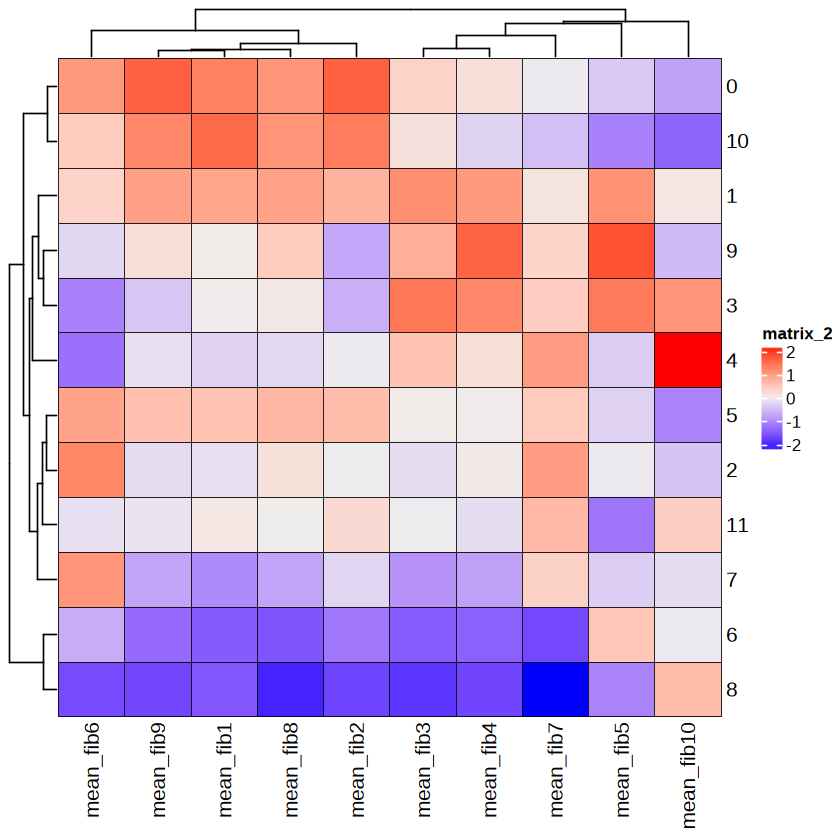

In [9]:
ht <- Heatmap(as.matrix(df_scaled), 
              rect_gp = gpar(col = "black", lwd = 0.5))

draw(ht)